<a href="https://colab.research.google.com/github/eeyuymew/Loft-house-layout/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №1**
# Временные ряды.

Временной ряд — это набор данных, собранных в разное время, который показывает изменения какого-то параметра.

Например, это может быть курс акций или погода.
Временные ряды помогают понять, как что-то меняется со временем, и предсказывать будущие значения.

Для изучения методов работы с ними в Python выполним задания ниже

### **1. Для начала импортируйте нужные библиотеки, которые будете использовать**

1. NumPy для работы с массивами и математическими функциями
2. Модуль random из NumPy для генерации случайных чисел
3. Библиотека Matplotlib для визуализации данных (строит графики)
4. Модуль signal из SciPy для генерации и обработки сигналов
5. Модуль stats из SciPy для статистического анализа
6. tsa - API временных рядов из библиотеки statsmodels функцию для построения графика автокорреляции из pandas
7. Функция для построения графика автокорреляции из statsmodels
8. Библиотека h5py для работы с файлами формата HDF5

In [ ]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
%matplotlib inline

### **2. Создайте выборку случайной величины с нормальным распределением (Временной ряд)**

In [ ]:
X = rand.randn(10000) # массив, который содержит 10,000 случайных чисел.
print(X)

[ 0.69006522 -0.56103893  0.57870404 ...  0.98985489 -0.05438574
 -1.35781866]


### **3. Создайте для выборки ряд временных отсчетов**

Надо, чтобы построить график

In [ ]:
t = np.linspace(3, 5, num = 10000) # временные отсчеты для нашего временного ряда - линейный равномерный массив из 1000 элементов от 3 до 5
print(t)

[3.         3.00020002 3.00040004 ... 4.99959996 4.99979998 5.        ]


### **4-5. Построить временной ряд на заданной временной сетке**

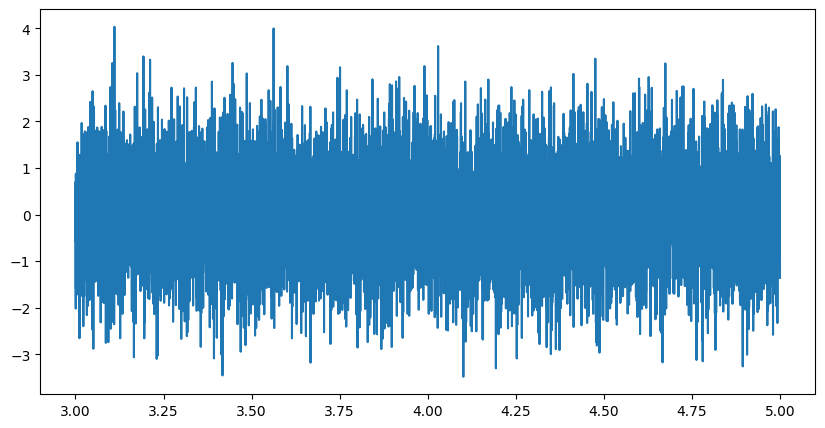

In [ ]:
plt.figure(figsize = (10, 5)) # размер рисуемой области
plt.plot(t, X) # значения ВР X на временной сетке t
plt.show()

### **6. Найти мат ожидание при помощи функции и формул из лекций**

> Математическое ожидание временного  - mean - это среднее значение всех возможных значений временного ряда, взвешенное по их вероятностям. Оно характеризует центр распределения временного ряда и дает представление о том, какое значение временного ряда можно ожидать в среднем.

Если математическое ожидание временного ряда близко к нулю, это может указывать на то, что значения временного ряда распределены относительно равномерно вокруг нуля, без явного смещения в положительную или отрицательную сторону.

Если математическое ожидание положительно, это может означать, что временной ряд имеет тенденцию к росту, а если отрицательно - к снижению

In [ ]:
#C помощью функции
Mean = np.mean(X)
print(Mean, "= математическое ожидание (функция)")

#По формуле из лекций
MyMean = np.sum(X) / len(X) # сумму всех значений делим на ее кол-во
print(MyMean, "= математическое ожидание (мой способ)")
print("Совпало :)")

-0.007764955111126576 = математическое ожидание (функция)
-0.007764955111126576 = математическое ожидание (мой способ)
Совпало :)


### **7. Найти дисперсию временного ряда при помощи функции и формул из лекций**

> Дисперсия временного ряда — это мера разброса данных вокруг их среднего значения. Она показывает, насколько сильно значения временного ряда отличаются от его среднего.

Высокая дисперсия указывает на то, что данные сильно разбросаны, а низкая — на то, что они близки друг к другу.

Сравнивая дисперсии разных временных рядов, можно определить, какой из них более изменчив или стабилен.

In [ ]:
#С помощью функции
Variance = np.var(X)
print(Variance, "= дисперсия (функция)")

#По формуле из лекций
MyVariance = np.sum((X - Mean) ** 2)/ len(X)
print(MyVariance, "= дисперсия (мой способ)")

print("Cовпало :)")

1.0127030617195798 = дисперсия (функция)
1.0127030617195798 = дисперсия (мой способ)
Cовпало :)


### **8. Найти асимметрию ВР при помощи функции и формул из лекций**

> Асимметрия временного ряда – это мера того, насколько неравномерно распределены значения данных во времени. Она показывает, есть ли смещение в сторону одного из концов ряда (влево или вправо).

Если асимметрия положительна, значит, данные более сконцентрированы справа от среднего значения, то есть имеется правосторонняя асимметрия. Если асимметрия отрицательна, данные более сконцентрированы слева от среднего, что указывает на левостороннюю асимметрию.

In [ ]:
#С помощью функции Skew
Skew = stats.skew(X)
print(Skew, "= асимметрия (функция)")

#По формуле из лекций
MySkew = np.mean((X - Mean) ** 3) / Variance ** 1.5
#Использовал функцию mean, тк по формуле уже считали (см п. 6)
print(MySkew, "= асимметрия (мой способ)")

print("Совпало :)")

0.016490264601862436 = асимметрия (функция)
0.016490264601862425 = асимметрия (мой способ)
Совпало :)


### **9. Найти эксцесс ВР при помощи функции и формул из лекций**

> Эксцесс временного ряда простыми словами – это мера того, насколько “остроконечным” или “плоским” является распределение данных по сравнению с нормальным распределением.
Нормальное распределение считается эталоном, и если эксцесс равен нулю, это означает, что распределение идеально соответствует нормальному.

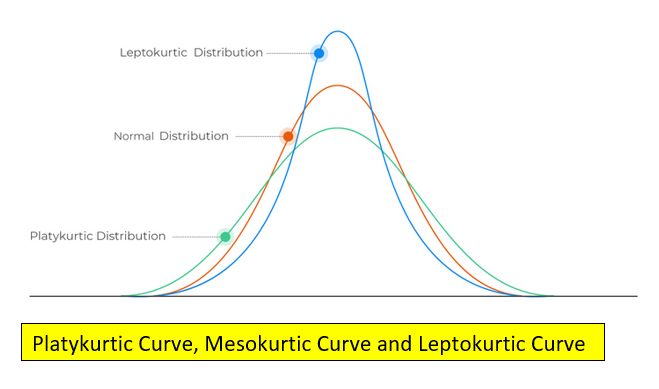

In [ ]:
#С помощью функции
Kurt = stats.kurtosis(X, fisher = False)
print(f'{Kurt} = эксцесс (функция)')

#По формуле из лекций
MyKurt = np.mean((X - Mean) ** 4) / Variance ** 2
print(f'{MyKurt} = эксцесс (мой способ)')

print("Совпало :)")

2.9952140921342663 = эксцесс (функция)
2.9952140921342663 = эксцесс (мой способ)
Совпало :)


### **10. Построить оценку выборочной автокорреляции ВР тремя способами**

- Автокорреляция - мера того, насколько текущее значение временного ряда связано с его предыдущими значениям. Она позволяет понять, насколько значения временного ряда коррелируют с его собственными прошлыми значениями

- Лаг - Это временной интервал, на который мы сдвигаем временной ряд для оценки корреляции

(-0.1, 1.0)

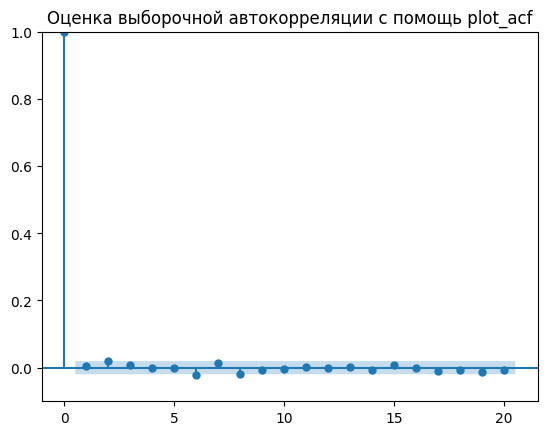

In [ ]:
#1. С помощью функции plot_acf(X, lags=20)
plot_acf(X, lags=20);
plt.title("Оценка выборочной автокорреляции с помощь plot_acf")
plt.ylim(-0.1 , 1.0)

[ 1.00005954e+00  4.23065723e-03  1.85570782e-02 ... -1.64161875e-04
  1.09734155e-05  1.52668168e-06]


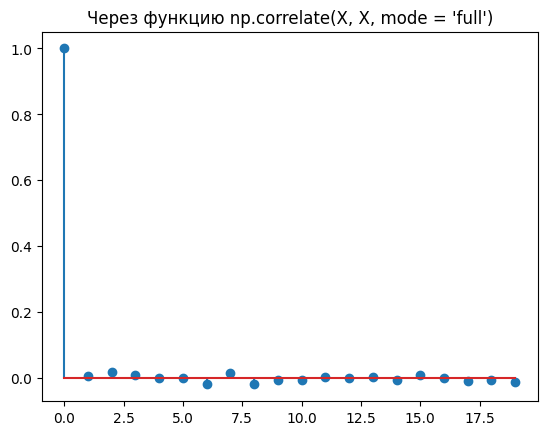

In [ ]:
#2. Через функцию np.correlate(X, X, mode = 'full')
df=np.correlate(X, X, mode = 'full')[np.size(X)-1:] # Оценка выборочной автокорреляции c помощью  расчетов через функцию correlate
df=df/Variance/np.size(X) # нормализуем полученные значения автокорреляции, для более эффективного сравнения
# Строим график
plt.stem(df[:20])
plt.title("Через функцию np.correlate(X, X, mode = 'full')")
print(df)

<ipython-input-31-ad0a93696616>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  C = np.append(C, np.sum((X[t]-Mean)*(X[t+lag]-Mean) for t in range(len(X)-lag))/(np.sum((X[t]-Mean)**2 for t in range(len(X)-lag))))


[ 1.00000000e+00  4.17135098e-03  1.84986167e-02  7.68557827e-03
  1.04632837e-04 -1.31289996e-03 -2.04777173e-02  1.42487614e-02
 -1.75531858e-02 -5.45980999e-03 -5.37504976e-03  1.54356061e-03
 -3.21736312e-04  1.11837325e-03 -7.14530469e-03  7.87393645e-03
 -1.93827748e-03 -9.29167014e-03 -6.58643234e-03 -1.28076259e-02]


<StemContainer object of 3 artists>

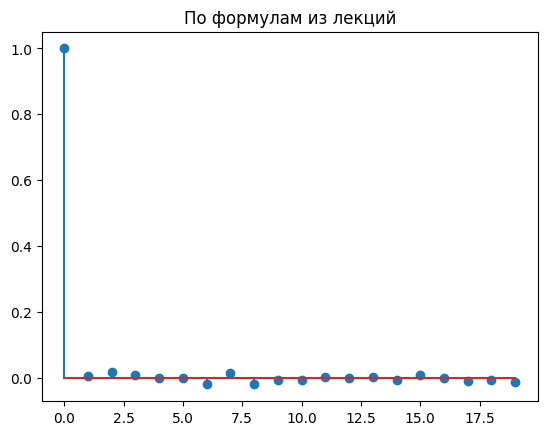

In [ ]:
#3. По формулам из лекций

C=[] # Массив для записи полученных значений
#Цикл, где мы для каждего лага расчитаваем значения оценки автокорреляции
for lag in range(20):
  now_corr = np.sum((X[t] - Mean) * (X[t + lag] - Mean) for t in range(len(X) - lag)) / (np.sum((X[t] - Mean) ** 2 for t in range(len(X) - lag)))
  C = np.append(C, now_corr)
print (C)
plt.title("По формулам из лекций")
plt.stem(C[:20])

### **11-12. Получить mat-файлы, c массивами ВР, по вариантам. Загрузить из этих mat-файлов массив ВР.**

In [ ]:
# Вариант 17
Xmat = h5py.File('17.mat', 'r')
Xmat = Xmat.get('z17')
Xmat = np.array(Xmat)
Xmat.ravel()

array([ 2.00000000e-01,  1.88164866e-01,  1.10309357e-01, -4.02884649e-01,
        9.40614957e-02, -5.28386915e-01,  3.55734725e-01, -2.37371550e-01,
        3.25434667e-03, -1.79355481e-01, -6.46213980e-02, -3.14807691e-01,
       -9.54689461e-02,  1.53956159e-01, -4.84405997e-02,  2.51892049e-01,
       -4.67111530e-02,  1.31543998e-03, -6.51925007e-02, -2.33549987e-01,
        1.33982814e-02, -4.27727245e-02, -4.61899810e-02, -3.36474516e-01,
        3.27740503e-02, -2.38900207e-01,  2.10412293e-01, -1.41791689e-01,
       -2.48359235e-02, -1.94507055e-01, -8.64444566e-02, -4.01081318e-01,
        5.13906529e-01, -5.03346886e-01, -1.94590084e-01,  4.01183363e-02,
        8.93656296e-02, -2.29966746e-01,  8.27143340e-02, -3.06694853e-02,
        3.48047319e-02,  2.05239354e-01, -4.23559132e-01,  5.02882451e-01,
       -1.06497804e-02,  1.15340506e-01, -2.53029716e-01, -9.12486537e-02,
       -4.21423303e-02, -6.08627719e-02,  9.44875283e-02,  1.30174991e-01,
        1.14005925e-01,  

### **13. Для Вашего варианта данных ВР вычислите все его характеристики, что были представлены ранее.**

In [ ]:
# Расчет Мат. ожидания
MyMean17 = np.sum(Xmat) / len(Xmat)

print(f'{MyMean17} = Математическое ожидание для 17 варианта')
print(f'{np.mean(Xmat)} = Проверка', '\n')

# Расчет дисперсии
MyVariance17 = np.sum ((Xmat - MyMean17) ** 2) / len(Xmat)
print(f'{MyVariance17} = Дисперсия для 17 варианта')
print(f'{np.var(Xmat)} = Проверка', '\n')

# Расчет асимметрии
MySkew17 = np.mean((Xmat - MyMean17) ** 3) / MyVariance17 ** 1.5
print(f'{MySkew17} = Ассиметрия для 17 варианта')
print(f'{stats.skew(Xmat)} = Проверка', '\n')

# Расчет эксцесса
MyKurt17 = np.mean((Xmat - MyMean17) ** 4) / MyVariance17 ** 2
print(f'{MyKurt17} = Эксцесс для 17 варианта')
print(f'{stats.kurtosis(Xmat, fisher = False)} = Проверка', '\n')

-0.008743979625228904 = Математическое ожидание для 17 варианта
-0.008743979625228904 = Проверка 

0.07565527081090573 = Дисперсия для 17 варианта
0.07565527081090573 = Проверка 

0.05788617034700397 = Ассиметрия для 17 варианта
[0.05788617] = Проверка 

2.814653602855361 = Эксцесс для 17 варианта
[2.8146536] = Проверка 



### **14. Пояснить, с чем могут быть связаны особенности поведения или значений тех или иных характеристик.**

1. Математическое ожидание (mean):  -0.008743979625228904
> В нашем случае оно отрицательное, что говорит о том, что большая часть данных отрицательна и близка к нулю


2. Дисперсия (variance):  0.07565527081090573
> В нашем случае дисперсия показывает насколько значения отклоняются от среднего значения. Значение достаточно большое

3. Асимметрия (skewness):  0.05788617034700397
> В этом случае асимметрия положительная, но близка к 0, что может говорить о том, что данные в ряду немного смещены вправо.

3. Эксцесс (kurtosis):  2.814653602855361
> В нашем случае эксцесс высокий, что может говорить о наличии значительных отклонений от среднего значения.

В целом, эти величины говорят о том, что данные в ряду заметно разбросаны с некоторыми значительными отклонениями от среднего значения, а распределение слегка правосторонне смещено.

Построим график значения для оценки правильности моих доводов

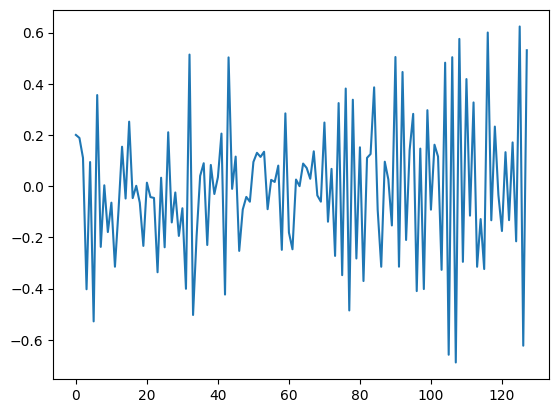

In [ ]:
plt.plot(Xmat) # значения ВР X
plt.show()

### **15.  Постройте периодический сигнал, имеющий 2 разных периодики:**

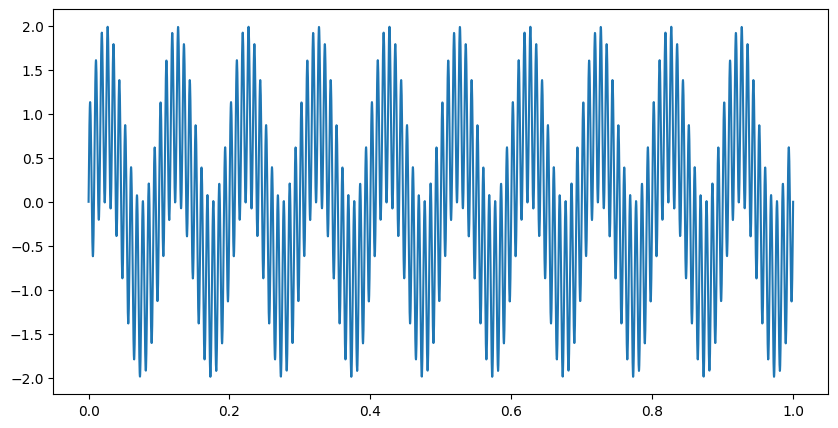

In [ ]:
t = np.linspace(0, 1, 4096)
Xmat1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t) # Построим периодический сигнал, имеющий 2 разных периодики

#Строим график
plt.figure(figsize = (10, 5))
plt.plot(t, Xmat1)
plt.show()

### **16. Оценим его количественные характеристики и построим его оценку выборочной автокорреляции методами из пунктов ранее.**

In [ ]:
# Расчет математического ожидания
print(f'{np.mean(Xmat1)} = Математическое ожидание', '\n')

# Расчет дисперсии
print(f'{np.var(Xmat1)} = Дисперсия', '\n')

# Расчет асимметрии
print(f'{stats.skew(Xmat1)} = Ассиметрия', '\n')

# Расчет эксцесса
print(f'{stats.kurtosis(Xmat1, fisher = False)} = Эксцесс', '\n')

4.85722573273506e-17 = Математическое ожидание 

0.9997558593750007 = Дисперсия 

1.1800440823367975e-15 = Ассиметрия 

2.2505494505494497 = Эксцесс 



- 4.85722573273506e-17 - Математическое ожидание
> В данном случае математическое ожидание очень близко к нулю, что может указывать на то, что значения временного ряда в среднем близки к нулю.

- 0.9997558593750007 - Дисперсия
> В данном случае значение дисперсии близко к единице, что может говорить о том, что значения временного ряда распределены достаточно равномерно.

- 1.1800440823367975e-15 - Ассиметрия
> В данном случае значение асимметрии очень мало, что может говорить о том, что распределение близко к симметричному.

- 2.2505494505494497 - Эксцесс
> В данном случае значение эксцесса больше трёх, что может говорить о том, что распределение имеет более острый пик, чем нормальное распределение.

### **17. Оцените его периодограмму и оценку спектральной плотности мощности ряда с помощью метода Велша (Welch)**

Что желательно знать для понимания:
- Мощность сигнала - это мера энергии сигнала, распределенная по частотам, что позволяет анализировать его характеристики.

- Периодограмма - это метод, который позволяет оценить спектр мощности сигнала, используя преобразование Фурье. Он вычисляет мощность сигнала в зависимости от частоты.

- Метод Велша - это усовершенствованный метод оценки спектра мощности, который уменьшает дисперсию оценки, разбивая сигнал на перекрывающиеся сегменты и усредняя результаты.

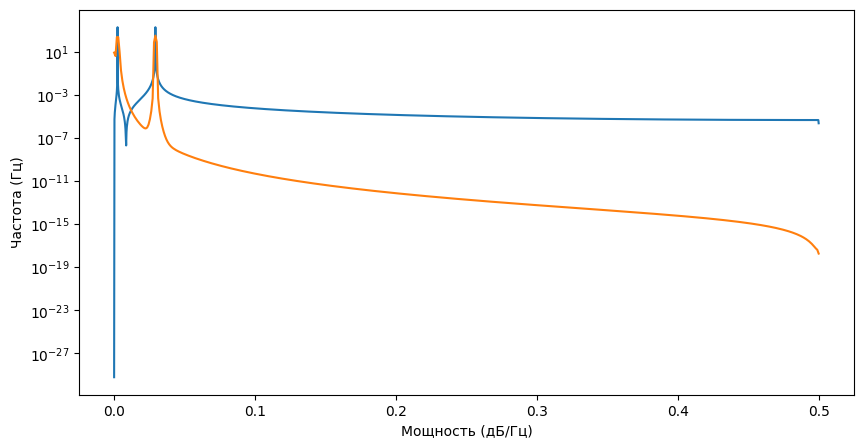

In [ ]:
# Вычисление периодограммы
pd1, pdden1 = signal.periodogram(Xmat1)

# Вычисление спектра мощности методом Велша
pdw1, pddenw1 = signal.welch(Xmat1, nperseg = 1024)

# Строим график
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.ylabel('Частота (Гц)')
plt.xlabel('Мощность (дБ/Гц)')
plt.semilogy(pdw1, pddenw1)
plt.show()

На обоих методах можно заметить два пика. Они должны соответсвовать пикам sin волн (10 и 120 Гц)

### **18. Создайте периодический сигнал с изломом частоты**

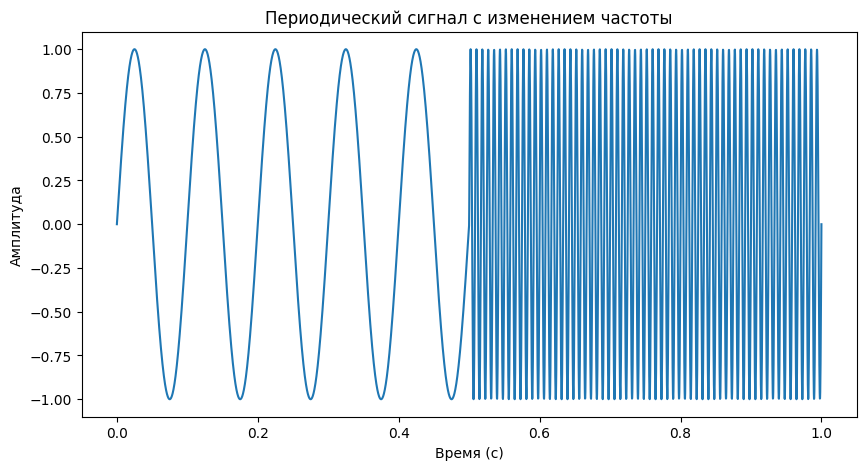

In [ ]:
# Создайте периодический сигнал с изломом частоты
t = np.linspace(0, 1, 4096) # Создаем временной массив от 0 до 1 с 4096 точками
x2 = np.zeros(4096) # Инициализируем массив нулей для сигнала

# Генерация сигнала с частотой 10 Гц для первой половины
for i in range(0, len(t)//2):
  x2[i] = np.sin(2*np.pi*10*t[i])

# Генерация сигнала с частотой 120 Гц для второй половины
for i in range(len(t)//2, len(t)):
  x2[i] = np.sin(2*np.pi*120*t[i])

# Строим график

plt.figure(figsize = (10, 5))
plt.title('Периодический сигнал с изменением частоты')
plt.plot(t, x2)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

### **19. Аналогично, оцените его периодограмму и спектр методом Велша.**

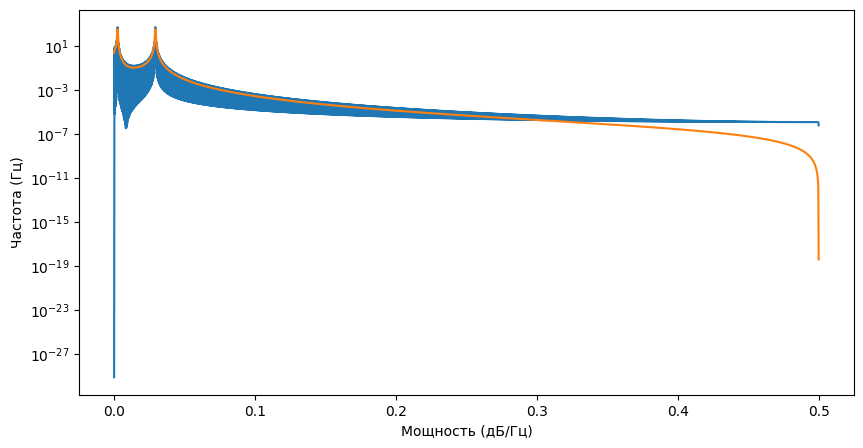

In [ ]:
# Вычисление периодограммы
pd2, pdden2 = signal.periodogram(x2)

# Вычисление спектра мощности методом Велша
pdw2, pddenw2 = signal.welch(x2, nperseg = 4096)

# Строим график
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)
plt.ylabel('Частота (Гц)')
plt.xlabel('Мощность (дБ/Гц)')
plt.show()

Также есть пики.

Размытие показывает изменение частоты в середине временного ряда.

### **20. Постройте спектры этих двух сигналов**

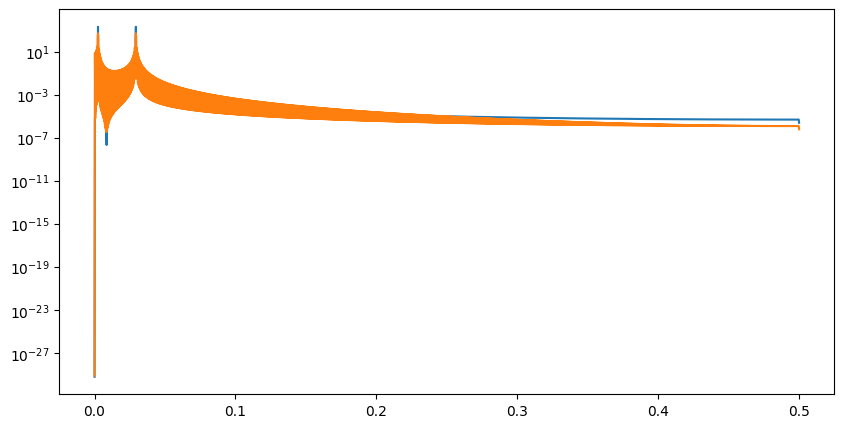

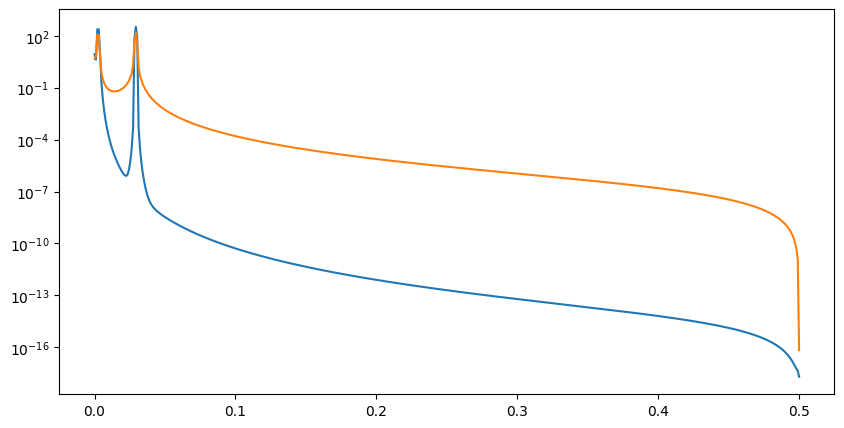

In [ ]:
# Периодограмма
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1) # Первый сигнал
plt.semilogy(pd2, pdden2) # Второй сигнал
# Спектр методом Велша
plt.figure(figsize = (10, 5))
plt.semilogy(pdw1, pddenw1) # Первый сигнал
plt.semilogy(pdw2, pddenw2) # Второй сигнал
plt.show()

### **21. Построим спектрограмму заданного ряда, чтобы вычислить его частотно-временные характеристики. Для этого сначала нам потребуется обязательно рассчитать его частоту дискретизации**

In [ ]:
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T - частота дискретизации
print(fs)

4095.0


### **22. Строим спектрограмму для суммы двух периодик**

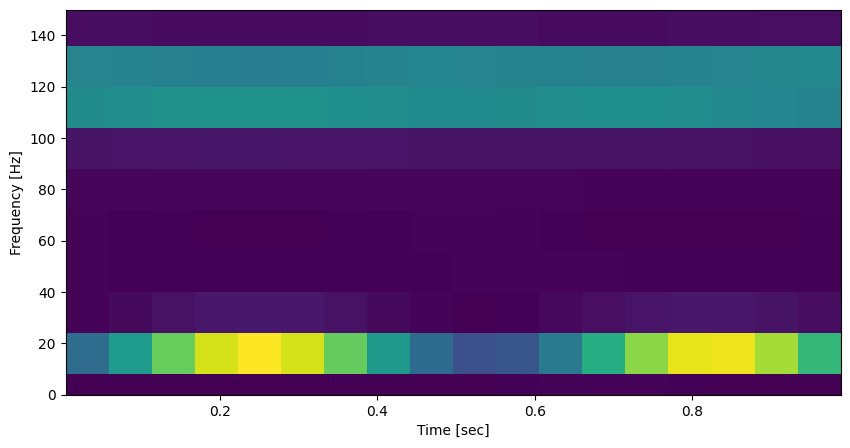

In [ ]:
f, tx, Sxx = signal.spectrogram(Xmat1, fs) # возвращаем частоту от времени

# Строим график
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

Судя по резким изменений цвета можно понять, что её точность низка.

### **23. Следует изменить параметры сегментов спектрограммы для более ярко-выраженного результата. Посмотрим спектограмму с новыми параметрами**

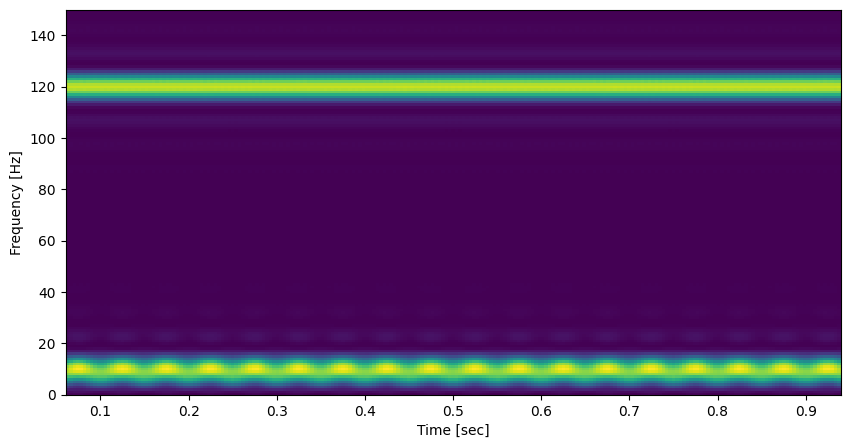

In [ ]:
f, tx, Sxx = signal.spectrogram(Xmat1, fs, nperseg = 512, noverlap = 496, nfft=4096) # длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

Теперь видим две четкие полосы, соответствующие частотам 10 Гц и 120 Гц

### **24. Теперь аналогично самостоятельно постройте спектрограмму второго ряда x2, представляющего собой отсчеты сигнала с изломом частоты. Подберите параметры его спектрограммы самостоятельно. Сравните полученные спектрограммы двух рядов между собой и сделайте выводы (где есть зависимость от времени, а где ее нет)**

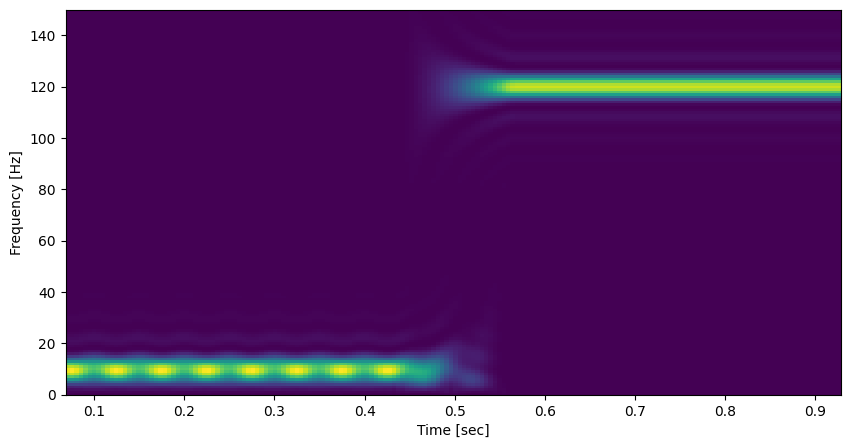

In [ ]:
f, tx, Sxx = signal.spectrogram(x2, fs, nperseg = 580, noverlap = 560, nfft=4096) # длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

Теперь по спектрограмме можно увидеть переход между частотами с 10 до 120 Гц.
- Почему так?

В первой спектограмме у нас нет перехода так как у первой спектрограммы нет зависимости частоты от времени. А здесь виден переход в период времени 0.5 с

### **25. Теперь создадим временной ряд с ЛЧМ (линейной частотной модуляцией) в диапазоне от 50 до 150 Гц**

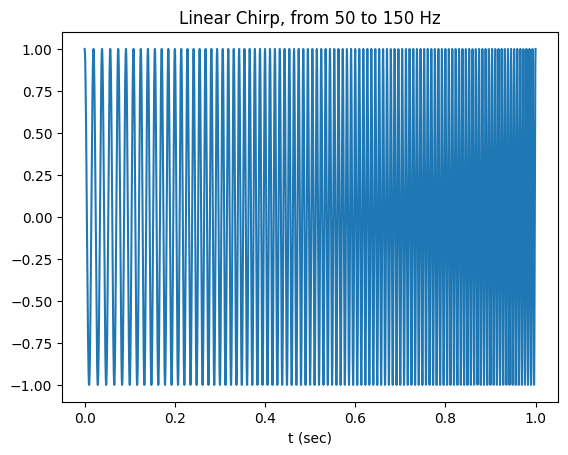

In [ ]:
tx = np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear')
# от 50 до 150 Гц за 1 секунду, ЛЧМ
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()

### **26. Самостоятельно постройте спектрограмму заданного ряда, чтобы вычислить его частотно-временные характеристики**

In [ ]:
fsX = 1/(tx[1]-tx[0]) # fs = 1/dt = N/T - частота дискретизации
print(fsX)

8191.0


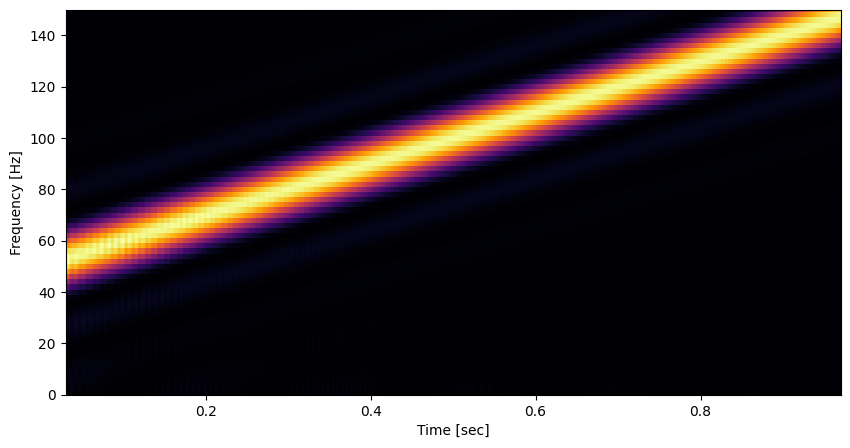

In [ ]:
f, tx, Sxx = signal.spectrogram(w, fsX, nperseg = 512, noverlap = 496, nfft=4096) # длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto', cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

### **27. Полученная картина спектрограммы должна хорошо отражать линейную структуру частотной модуляции**

На спектрограмме видно, что частота возрастает линейно

### **28. Запишем все это на языке Python**

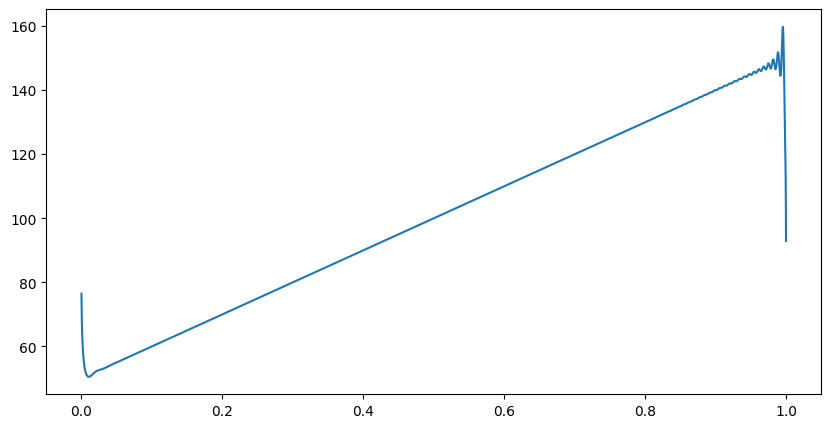

In [ ]:
tx = np.linspace(0, 1, 8192)

analytic_signal = signal.hilbert(w) # аналитический сигнал

instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде

instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)*fsX)# мгновенная частота как производная от фазы, приведенная в Гц

plt.figure(figsize = (10, 5)) # из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:

plt.plot(tx[1:], instantaneous_frequency[0:])
plt.show()


### **29. По формулам из п. 27 выше также постройте Мгновенную амплитуду ряда и Мгновенную фазу ряда.**

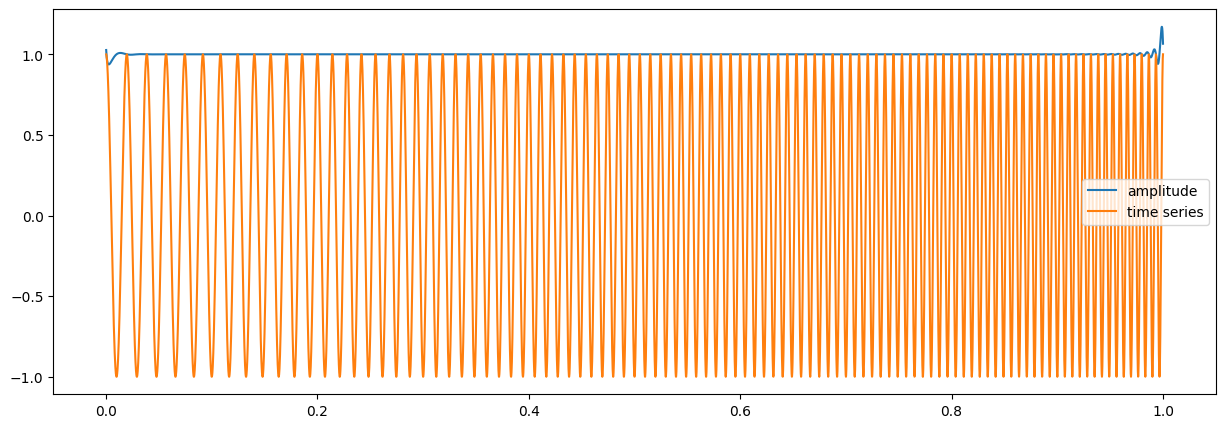

In [ ]:
inst_ampl = np.abs(analytic_signal) # амплитуда
instantaneous_phase = np.unwrap(np.angle(analytic_signal)) # мгновенная фаза

plt.figure(figsize=(15, 5))
plt.plot(tx[1:], inst_ampl[1:], label="amplitude")
plt.plot(tx[1:], w[1:], label="time series")
plt.legend(loc="center right")
plt.show()

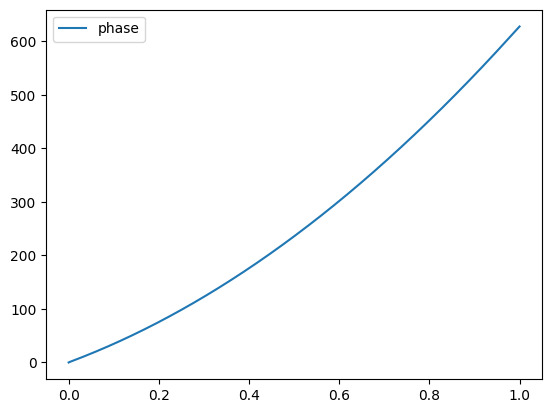

In [ ]:
plt.plot(tx[1:8190], instantaneous_phase[1:8190], label="phase")
plt.legend(loc="upper left")
plt.show()

### **30. Теперь, когда нам известно, как оценить частотно-временные характеристики ряда, постройте периодограммы, спектры Велша, а также функции частоты от времени через спектрограмму и преобразование Гильберта для следующих модельных временных рядов**

- Преобразование Хилберта: Это математическая операция, которая преобразует реальный сигнал в комплексный, позволяя выделить его мгновенные характеристики.
Мгновенная амплитуда, показывает, как амплитуда сигнала изменяется во времени.

- Периодограмма: это метод оценки спектра мощности сигнала. Он показывает, как распределена мощность сигнала по частотам.
- Метод Велша - улучшенный метод спектра

- Спектрограмма: Это визуальное представление частотного спектра сигнала в зависимости от времени.

In [ ]:
# для удобства создадим функции,
# в которых будут строится графики для заданного ряда

def plots(w, tx):
  #Анализ амплитуды сигнала с использованием преобразования Хилберта
  analytic_signal = signal.hilbert(w)
  inst_ampl = np.abs(analytic_signal)
  plt.figure(figsize = (20, 5))
  plt.plot(tx[1:], inst_ampl[1:], label="amplitude")
  plt.plot(tx, w)
  plt.title("Анализ амплитуды сигнала с использованием преобразования Хилберта")
  plt.show()

  # Строим график перидограммы и спектра Велша
  pd, pdden = signal.periodogram(w) # Периодограмма
  pdw2, pddenw2 = signal.welch(w, nperseg = 1024) # Спектры Велша
  plt.figure()
  plt.semilogy(pd, pdden) # Периодограмма
  plt.semilogy(pdw2, pddenw2, ) # Спектры Велша
  plt.title("Периодограмма")
  plt.show()

  # Строим спектрограммму
  fs = 1/(tx[1]-tx[0]) # fs = 1/dt = N/T - частота дискретизации
  f, tx2, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096) # Попробую обьяснить что значит каждый параметр
  # w: наш сигнал.
  # fs: частота дискретизации.
  # nperseg: количество точек в каждом сегменте (512).
  # noverlap: количество перекрывающихся точек между сегментами (496).
  # nfft: количество точек для вычисления БПФ (4096).
  # Строим графика
  plt.figure(figsize = (10, 5))
  plt.pcolormesh(tx2, f, Sxx, shading='auto', cmap='plasma')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.title("Спектограмма")
  plt.show()

31.

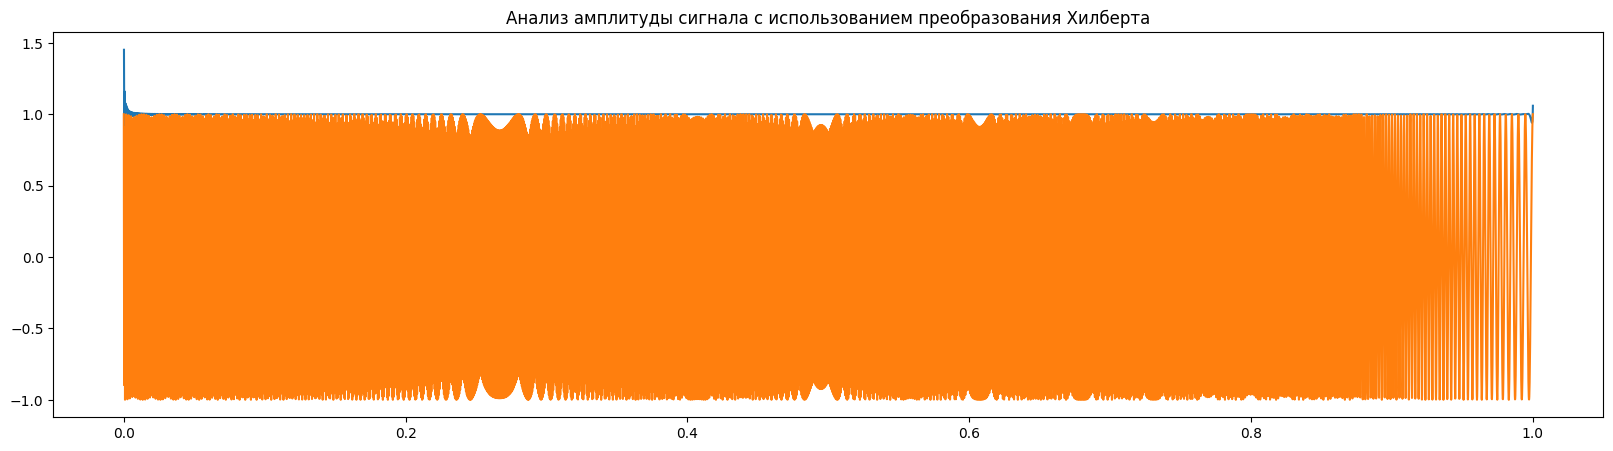

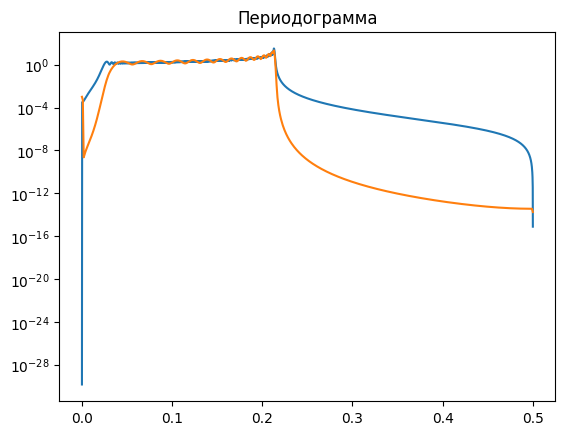

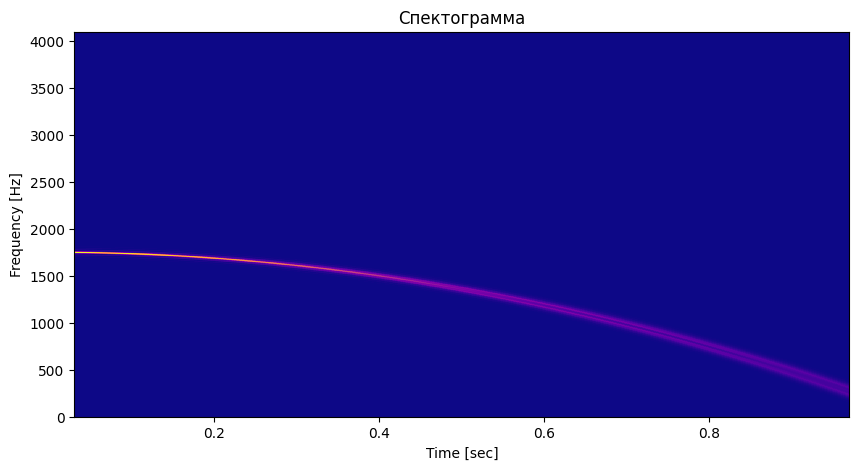

In [ ]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=1750, f1=178, t1=1, method='quadratic')
plots(w, tx)

32.

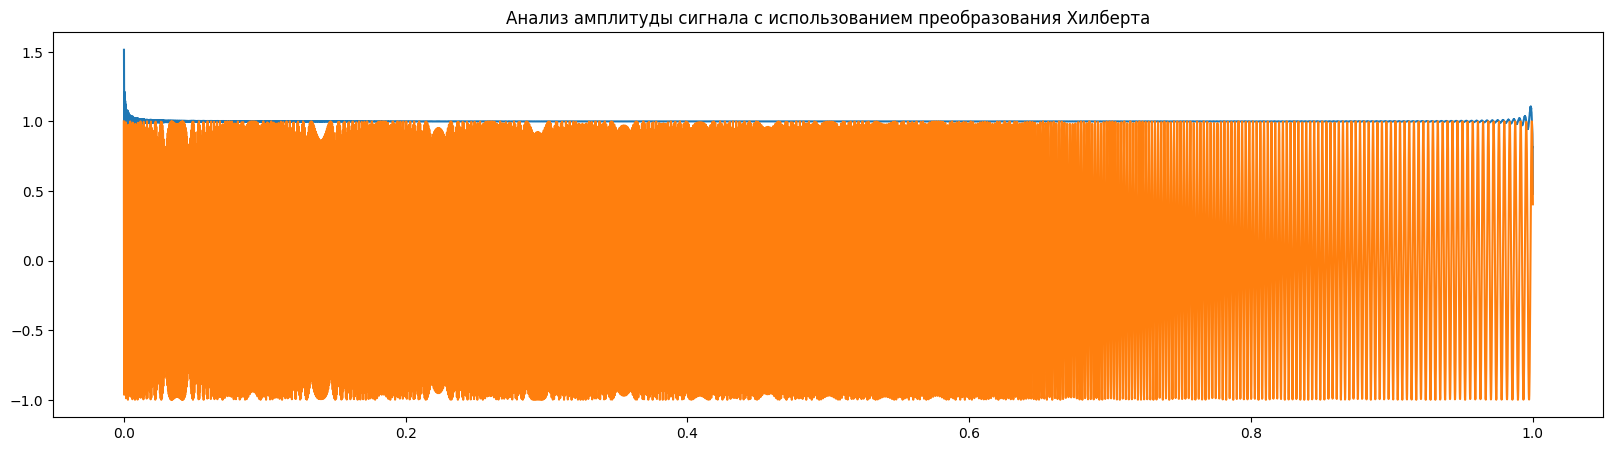

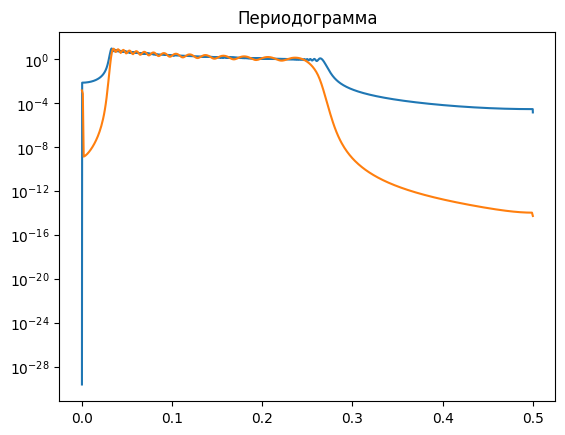

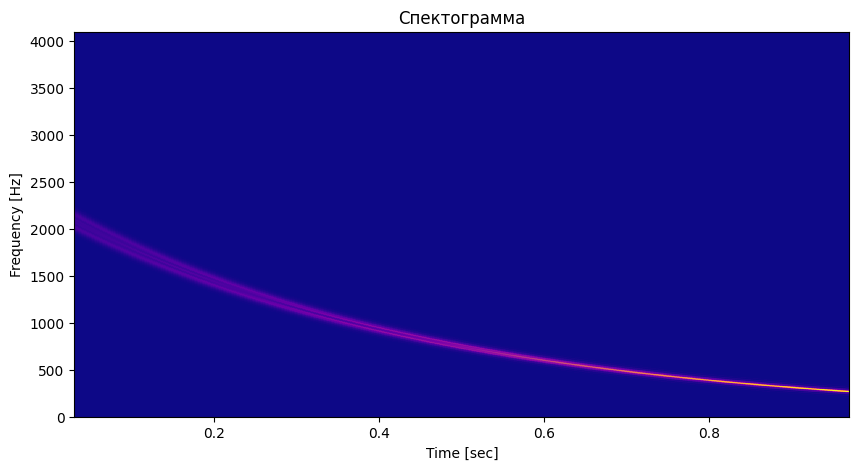

In [ ]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2224, f1=250, t1=1, method='logarithmic')
plots(w, tx)

33.

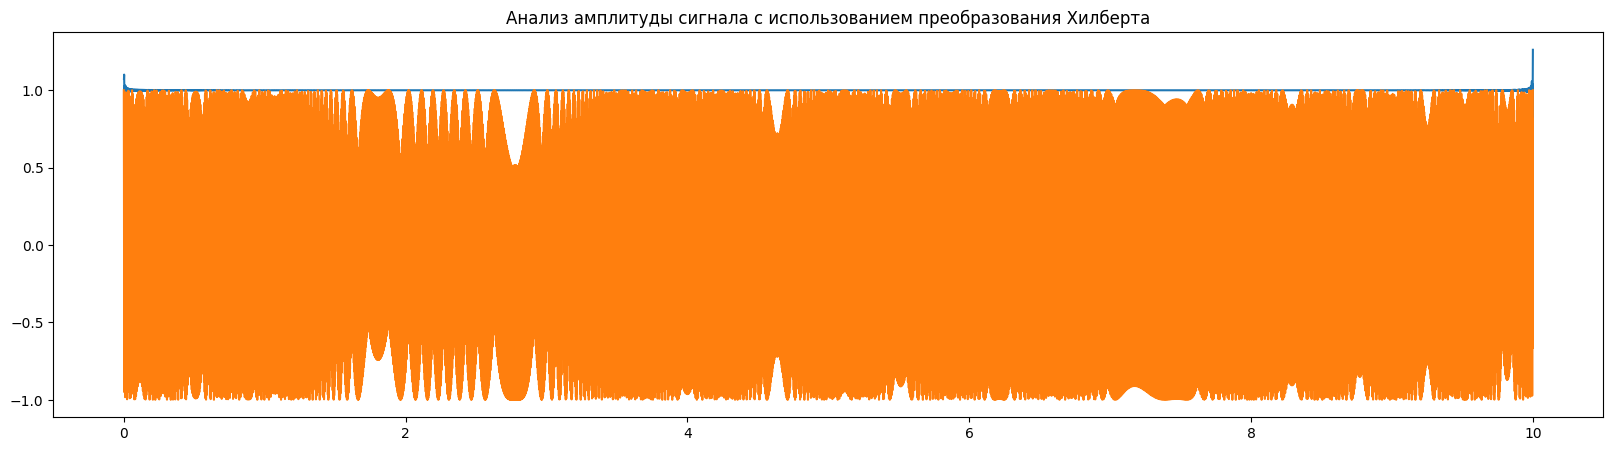

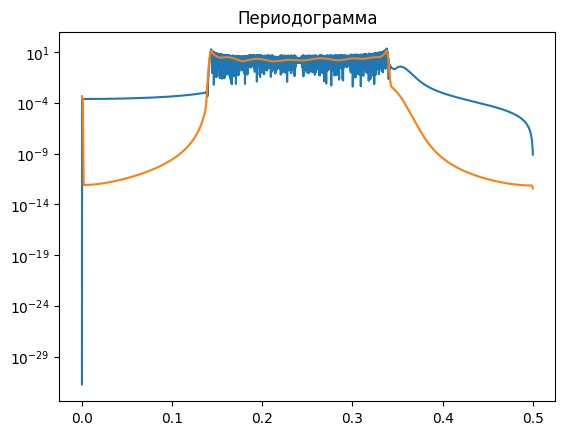

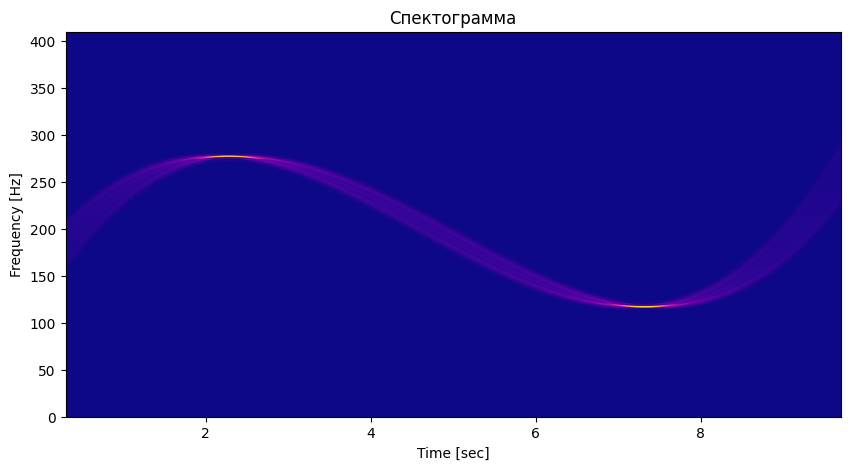

In [ ]:
tx = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
w = signal.sweep_poly(tx, p)
plots(w, tx)

34.

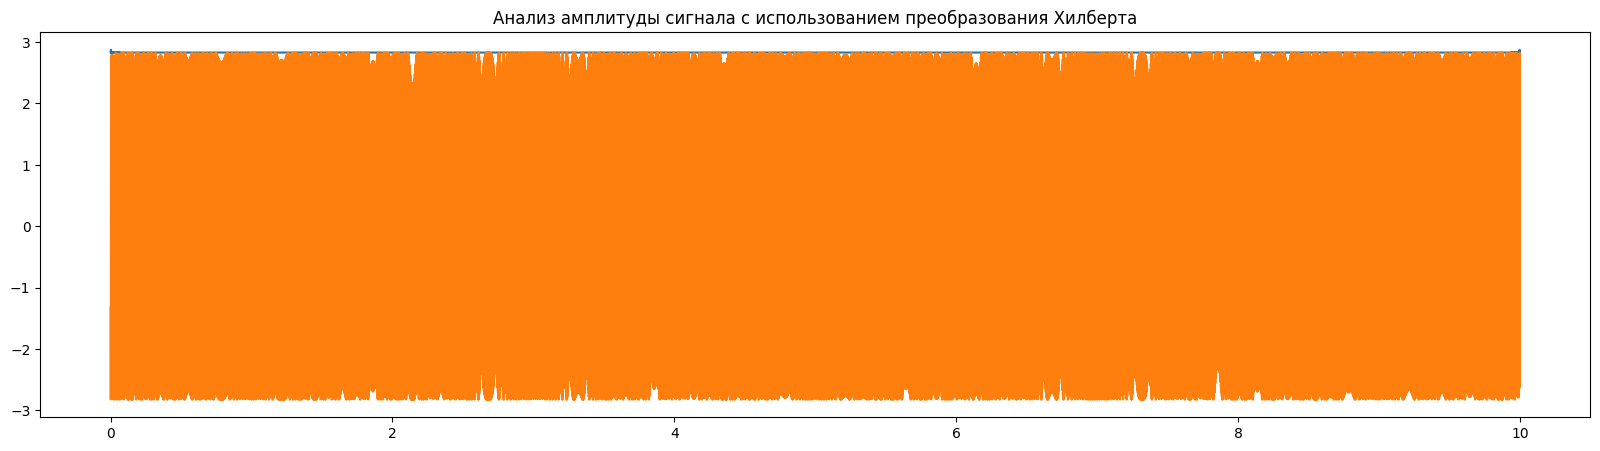

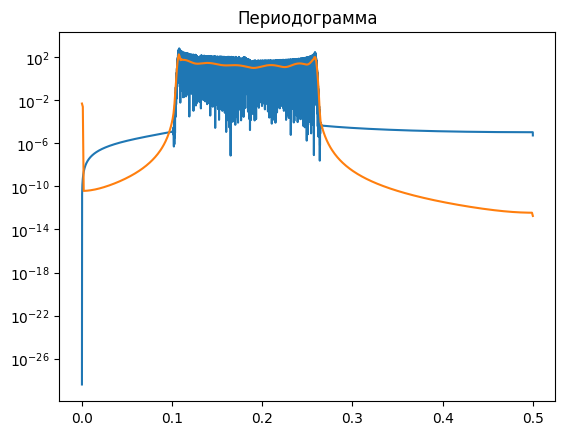

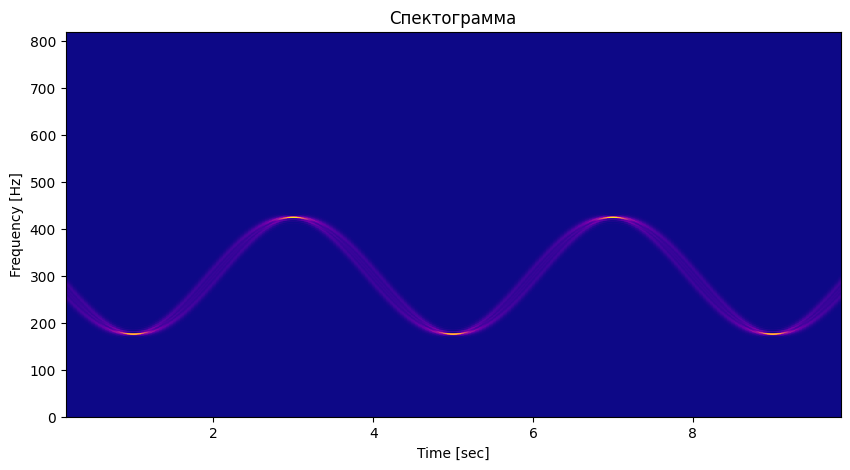

In [ ]:
tx = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*tx)
w = 2 * np.sqrt(2) * np.sin(2*np.pi*300*tx + mod)
plots(w, tx)

### **35. Создайте временной ряд из 4 периодик, при этом все частоты в нем должны быть взаимно-простыми числами.**

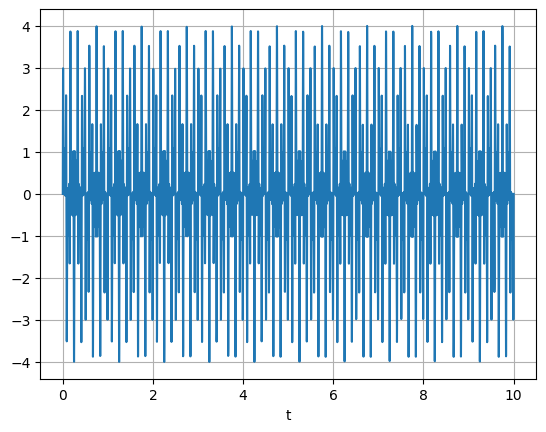

In [ ]:
t = np.linspace(0, 10, 8192)
f = [7, 19, 31, 43]
u = 0
for period in f:
    u += np.sin(2 * np.pi * t * period)

plt.plot(t, u)
plt.xlabel('t')
plt.grid(True)
plt.show()

### **36. Постройте его периодограмму, спектр Велша, спектрограмму и мгновенную частоту по Гильберту**

- Преобразование Гилберта: это математическая операция, которая позволяет получить аналитический сигнал из реального. Аналитический сигнал содержит информацию о мгновенной амплитуде и фазе.

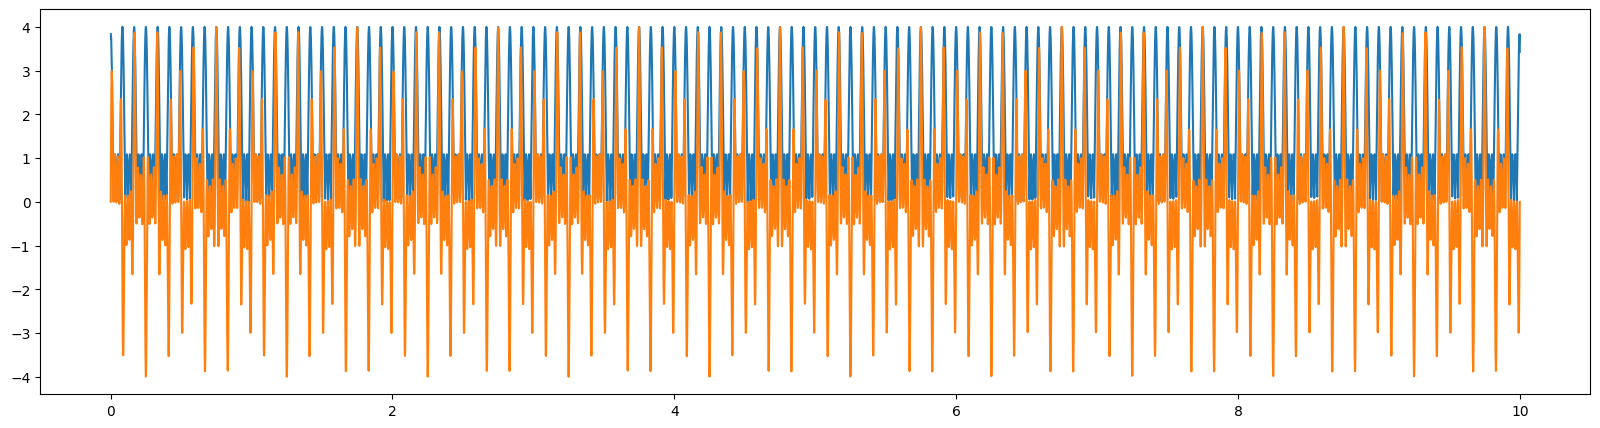

In [ ]:
plt.figure(figsize = (20, 5))
analytic_signal = signal.hilbert(u) # Применяем преобразование Гильберта
inst_ampl = np.abs(analytic_signal)
# Строим график мгновенной амплитуды
plt.plot(t[1:], inst_ampl[1:])
# Строим график исходного сигнала
plt.plot(t, u)
plt.show()

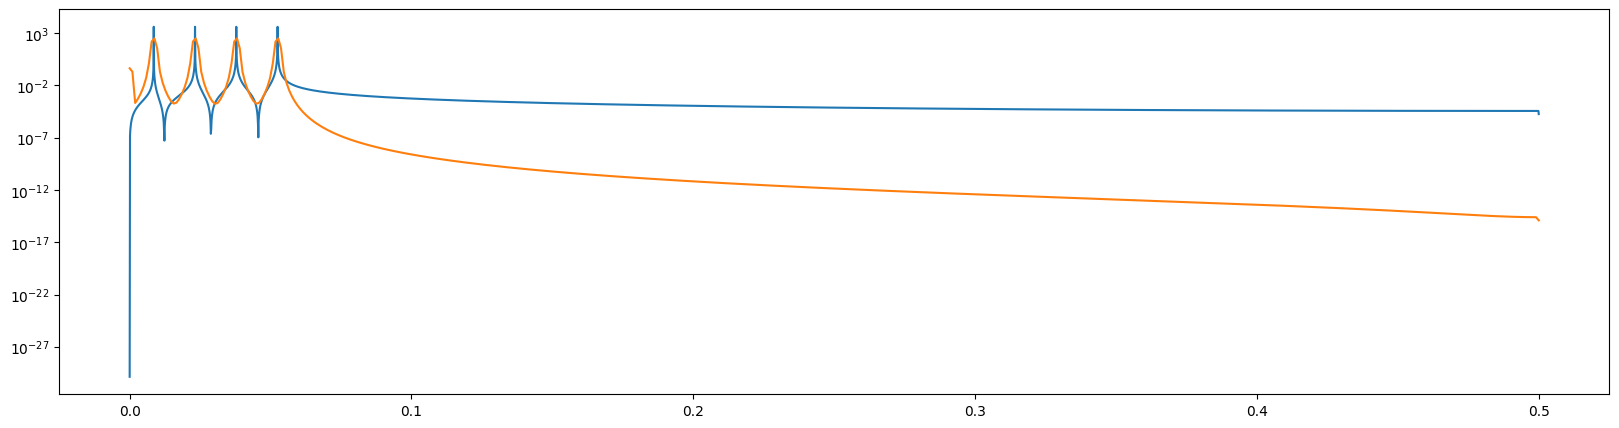

In [ ]:
pd, pdden = signal.periodogram(u) # периодограмма
pdw2, pddenw2 = signal.welch(u, nperseg = 1024) # спектры Велша
plt.figure(figsize = (20, 5))
plt.semilogy(pd, pdden)
plt.semilogy(pdw2, pddenw2)
plt.show()

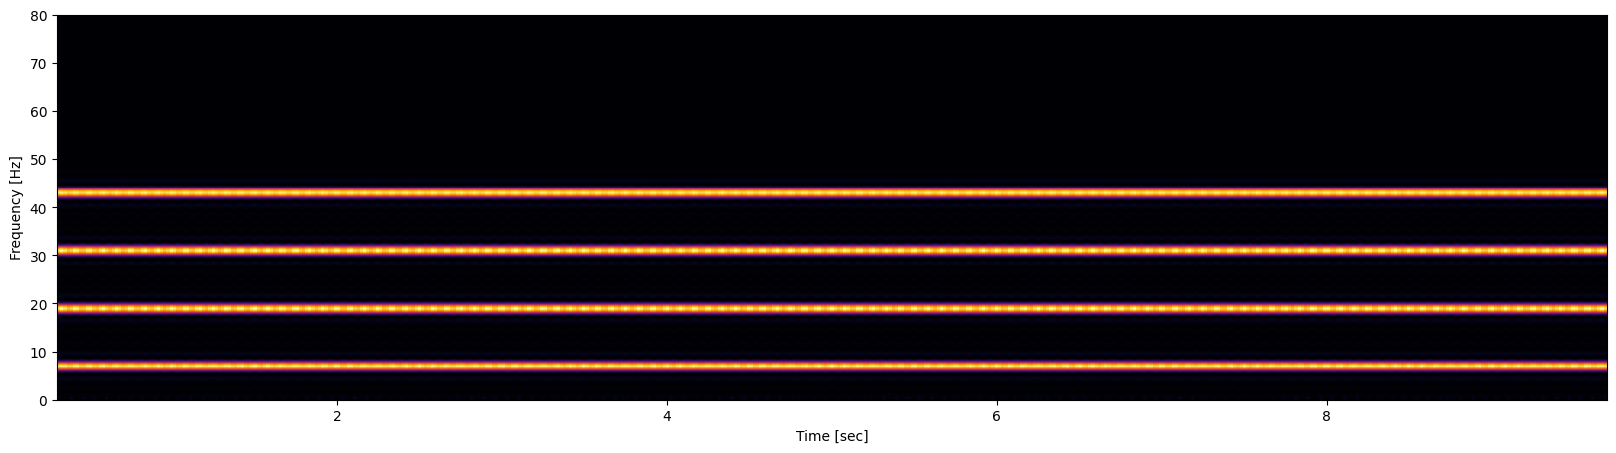

In [ ]:
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T - частота дискретизации

f, tx2, Sxx = signal.spectrogram(u, fs, nperseg = 512, noverlap = 496, nfft=4096) # длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (20, 5))
plt.ylim(0, 80)
plt.pcolormesh(tx2, f, Sxx, shading='auto', cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

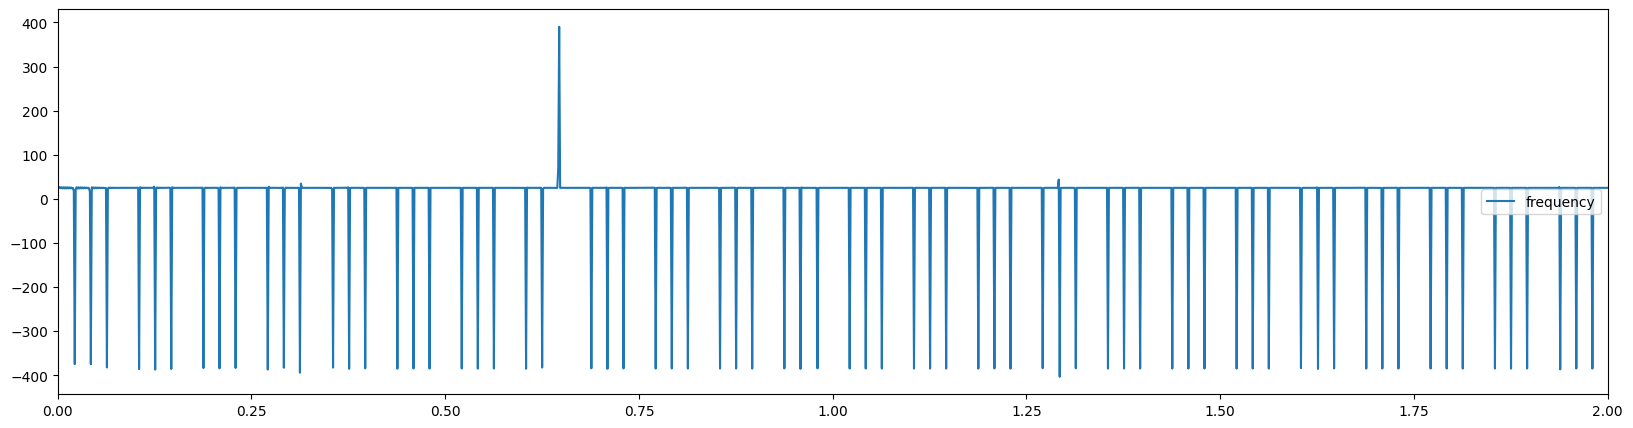

In [ ]:
analytic_signal = signal.hilbert(u) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)*fs)# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (20, 5))
plt.xlim(0, 2)
plt.plot(t[1:], instantaneous_frequency[0:], label="frequency")
plt.legend(loc="center right")
plt.show()

### **38. Постройте функции мгновенной частоты через Преобразование Гильберта для каждого отдельного синуса из исходного ВР**

[array([ 0.00000000e+00,  5.36700829e-02,  1.07185459e-01, ...,
       -1.07185459e-01, -5.36700829e-02, -3.13559099e-14]), array([ 0.00000000e+00,  1.45230527e-01,  2.87381541e-01, ...,
       -2.87381541e-01, -1.45230527e-01, -3.90401422e-15]), array([ 0.00000000e+00,  2.35561270e-01,  4.57864917e-01, ...,
       -4.57864917e-01, -2.35561270e-01, -9.01389563e-14]), array([ 0.00000000e+00,  3.23897461e-01,  6.12873717e-01, ...,
       -6.12873717e-01, -3.23897461e-01, -1.76373898e-13])]


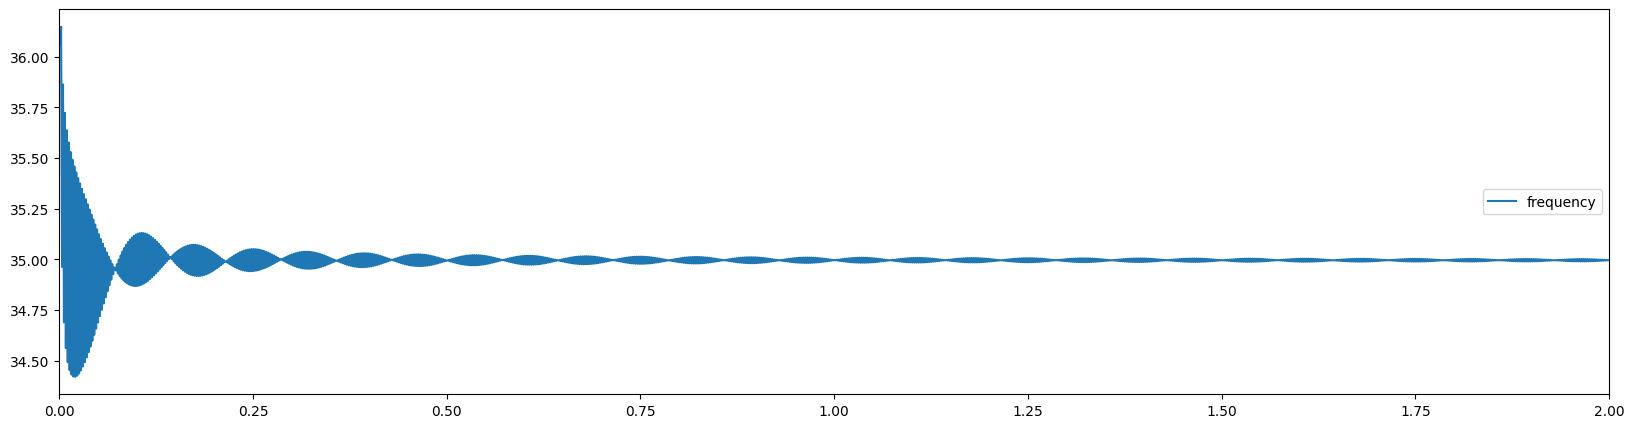

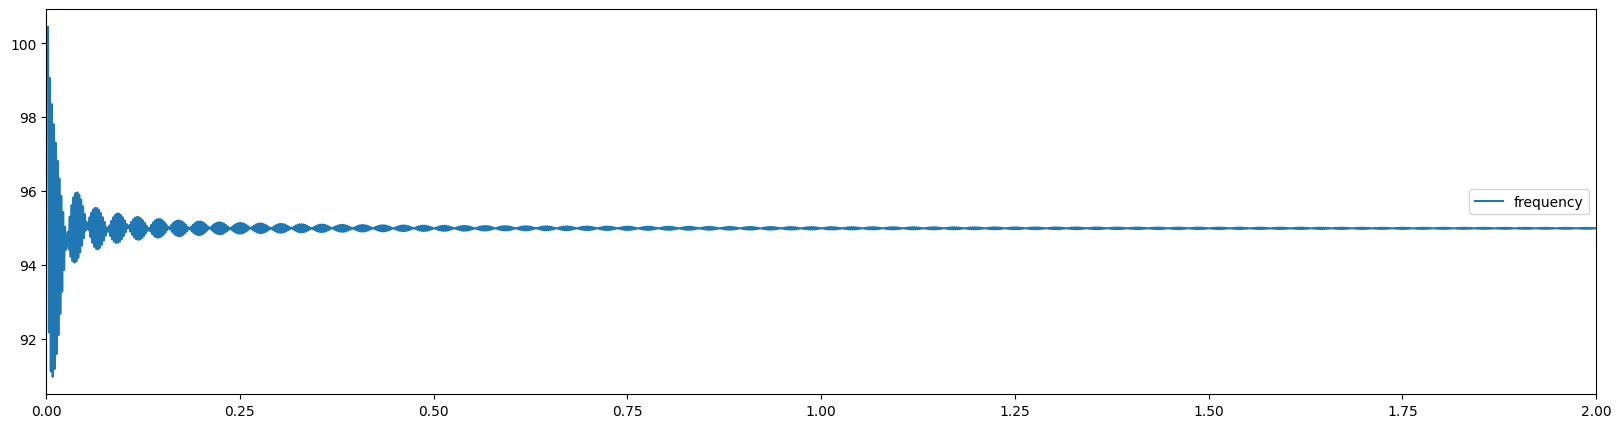

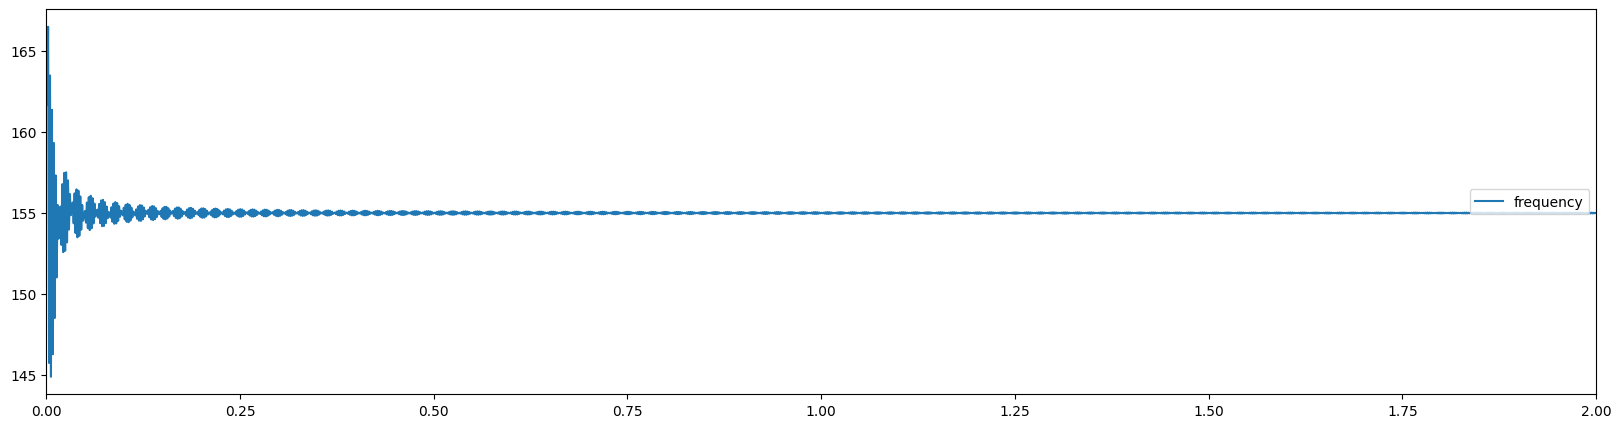

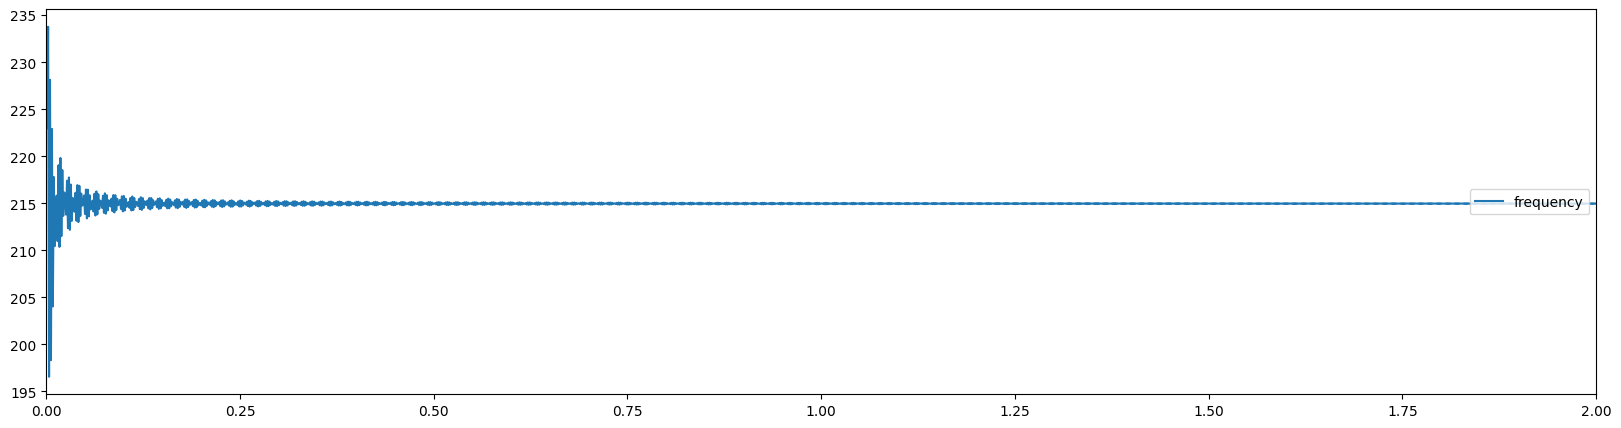

In [ ]:
# Генерация временной оси
t = np.linspace(0, 10, 8192)
f = [7, 19, 31, 43] # периодики
u = []

# Генерация синусоидальных сигналов
for period in f:
  u.append(np.sin(2 * np.pi * t * period))
print(u)

# Анализ мгновенной частоты
for i in u:
  analytic_signal = signal.hilbert(i) # аналитический сигнал
  instantaneous_phase = np.unwrap(np.angle(analytic_signal)) # мгновенная фаза в развернутом непрерывном виде
  instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)*fs) # Вычисление мгновенной частоты, в Гц

  plt.figure(figsize = (20, 5))
  plt.xlim(0, 2)
  plt.plot(t[1:], instantaneous_frequency[0:], label="frequency")
  plt.legend(loc="center right")
  plt.show()